# Bearbeitung des Datensatzes "Checkout" der Seattle Public Library mit Jupyter Notebook

Grundlage der Aufgabe sind die offenen Checkout-Daten der Seattle Public Library.
Gemäß der Aufgabenstellung soll in einer Datenanalyse unter Verwendung eines Jupyter Notebooks und Python jeweils eine Lösung zu selbstgewählten Fragen implementiert werden.
Für den Datensatz "Checkout" sollen folgende Fragestellungen beabeitet werden:

-	Wie viele digitale Medien wurden 2018 je Monat ausgeliehen?
-	Wie viele physische und digitale Medien wurden 2018 je Monat im Vergleich ausgeliehen?
-	Welche und wie viele weitere Medien gibt es 2018 in der Bibliothek?
- Welcher Titel des Materialtyps Musik wurde 2018 am häufigsten ausgeliehen?



In [21]:
# Zur Erweiterung der Python-Befehle müssen zunächst weitere Bibliotheken heruntergeladen werden: ulib.request, pandas sowie matplot.lib, da einige der Ergebnisse auch grafisch dargestellt werden sollen.
import urllib.request

In [22]:
import pandas as pd

In [23]:
import matplotlib.pyplot as plt

In [24]:
# Download der Daten: Zunächst wird eine Variable für die URL bzw. die .csv-Datei festgelegt. Aus der Aufgabenstellung wissen wir die ungefähre Zahl der Ausleihen und legen das Limit auf 3.000.000:
url="https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=checkoutyear=2018&$limit=3000000"
coachtzehn="checkouts2018.csv"



In [25]:
# Anschließend erfolgt der Download
urllib.request.urlretrieve(url, coachtzehn)

('checkouts2018.csv', <http.client.HTTPMessage at 0x20bf4bd6dc8>)

In [26]:
# Erstellen einer Variablen zum Lesen der Datei
checkout = pd.read_csv(coachtzehn)

In [13]:
# Wir können uns nun die Datei anzeigen lassen
checkout

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
0,Physical,Horizon,BOOK,2018,12,1,"Naruto. Vol. 65, Hashirama and Madara / story ...","Kishimoto, Masashi, 1974-",Naruto Fictitious character Comic books strips...,"VIZ Media,",[2014]
1,Physical,Horizon,BOOK,2018,12,2,Oishisō na shirokuma / Shibata Keiko.,"Shibata, Keiko.","Polar bear Juvenile fiction, Food Juvenile fic...","Pīeichipīkenkyūjo,",2017.
2,Physical,Horizon,VIDEODISC,2018,12,7,Like crazy / Paramount Vantage ; Indian Paintb...,NaN,"First loves Drama, College students Drama, Fea...","Paramount Home Entertainment,",[2012]
3,Digital,OverDrive,AUDIOBOOK,2018,12,3,Catch a Falling Heiress: American Heiress In L...,Laura Lee Guhrke,"Fiction, Historical Fiction, Romance",HarperCollins Publishers Inc.,2016
4,Physical,Horizon,BOOK,2018,12,1,Literally show me a healthy person / Darcie Wi...,"Wilder, Darcie","Young women Fiction, Grief Fiction","Tyrant Books,",[2017]
...,...,...,...,...,...,...,...,...,...,...,...
2665093,Digital,Hoopla,MUSIC,2018,1,1,The Snow Queen,NaN,Pop,LIGHTYEAR,NaN
2665094,Physical,Horizon,BOOK,2018,1,4,There was an old lady who swallowed a fly / il...,NaN,"Nonsense verses Juvenile literature, Folk song...","Child's Play,",2002.
2665095,Physical,Horizon,BOOK,2018,1,2,The book of night women / Marlon James.,"James, Marlon, 1970-","Slaves Fiction, Jamaica Fiction, Historical fi...","Riverhead Books,",2010.
2665096,Physical,Horizon,BOOK,2018,1,1,Hunting Eve / Iris Johansen.,"Johansen, Iris","Duncan Eve Fictitious character Fiction, Track...","St. Martin's Press,",2013.


In [30]:
# Um uns eine kurze Übersicht über die Columns bzw. Spalten zu verschaffen, lassen wir uns dies anzeigen
checkout.columns

Index(['usageclass', 'checkouttype', 'materialtype', 'checkoutyear',
       'checkoutmonth', 'checkouts', 'title', 'creator', 'subjects',
       'publisher', 'publicationyear'],
      dtype='object')

## Frage 1: Wie viele digitale Medien wurden 2018 je Monat ausgeliehen?

In [31]:
# Wir reduzieren die Tabelle auf die für uns relvanten Spalten Medientyp (usageclass), Monat (checkoutmonth) und Ausleihen (checkouts)
checkout[["usageclass","checkoutmonth","checkouts"]]

,usageclass,checkoutmonth,checkouts
0,Physical,12,1
1,Physical,12,2
2,Physical,12,7
3,Digital,12,3
4,Physical,12,1
...,...,...,...
2665093,Digital,1,1
2665094,Physical,1,4
2665095,Physical,1,2
2665096,Physical,1,1


In [32]:
# Für unsere Frage sind in der Spalte "usageclass" nur die digitalen Medien relevant. Wir filtern diese heraus
# Zunächst teilen wir die Tabelle
digiall=checkout.usageclass.str.contains(pat="Digital")
digiall

0          False
1          False
2          False
3           True
4          False
           ...  
2665093     True
2665094    False
2665095    False
2665096    False
2665097    False
Name: usageclass, Length: 2665098, dtype: bool

In [33]:
# Wir erstellen eine neue Tabelle
digionly=checkout[digiall]
digionly

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,creator,subjects,publisher,publicationyear
3,Digital,OverDrive,AUDIOBOOK,2018,12,3,Catch a Falling Heiress: American Heiress In L...,Laura Lee Guhrke,"Fiction, Historical Fiction, Romance",HarperCollins Publishers Inc.,2016
7,Digital,OverDrive,EBOOK,2018,12,6,Broken Things,Lauren Oliver,"Suspense, Thriller, Young Adult Fiction, Young...",HarperCollins Publishers Inc.,2018
17,Digital,OverDrive,EBOOK,2018,12,2,El hacedor,Jorge Luis Borges,"Fiction, Poetry","Random House, Inc.",2013
18,Digital,OverDrive,AUDIOBOOK,2018,12,12,The Mystery of the Exploding Teeth: And Other ...,Thomas Morris,"History, Medical, Nonfiction, Reference",Books on Tape,2018
21,Digital,OverDrive,EBOOK,2018,12,6,Men We Reaped: A Memoir,Jesmyn Ward,"African American Nonfiction, Biography & Autob...",Bloomsbury USA,2013
...,...,...,...,...,...,...,...,...,...,...,...
2665086,Digital,OverDrive,EBOOK,2018,1,1,Volume Four,Brian James Freeman,"Fantasy, Fiction, Horror, Romance","Random House, Inc.",2017
2665087,Digital,Freegal,SONG,2018,1,1,The Auld Triangle,The Dubliners,NaN,NaN,NaN
2665089,Digital,OverDrive,AUDIOBOOK,2018,1,1,"Get Motivated!: Overcome Any Obstacle, Achieve...",Tamara Lowe,"Business, Nonfiction",Books on Tape,2009
2665091,Digital,OverDrive,EBOOK,2018,1,1,Sin and Sensibility: The Griffin Family Series...,Suzanne Enoch,"Fiction, Historical Fiction, Romance",HarperCollins Publishers Inc.,2010


In [34]:
# Wir reduzierendie Tabelle wieder auf die für uns relevanten Spalten. Die Spalte "usageclass" kann jetzt auch wegfallen
digionly[["checkoutmonth","checkouts"]]

,checkoutmonth,checkouts
3,12,3
7,12,6
17,12,2
18,12,12
21,12,6
...,...,...
2665086,1,1
2665087,1,1
2665089,1,1
2665091,1,1


In [35]:
checkoutend=digionly[["checkoutmonth","checkouts"]]
checkoutend

,checkoutmonth,checkouts
3,12,3
7,12,6
17,12,2
18,12,12
21,12,6
...,...,...
2665086,1,1
2665087,1,1
2665089,1,1
2665091,1,1


In [36]:
# Zunächst wandeln wir unser Ergebnis in eine Pivot-Tabelle
digipiv=checkoutend.pivot_table(index="checkoutmonth", values="checkouts", aggfunc="count")
digipiv

,checkouts
checkoutmonth,
1,95694
2,91466
3,95617
4,82697
5,76982
6,73696
7,76787
8,77326
9,73560


Text(0.5, 1.0, 'Wie viele digitale Medien wurden 2018 je Monat ausgeliehen?')

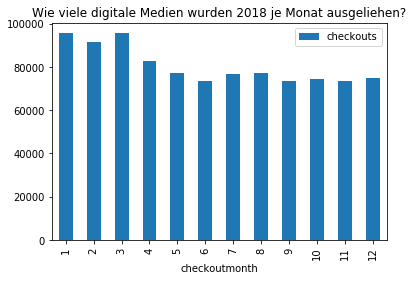

In [37]:
# Abschließend stellen wir es mit einem Säulendiagramm grafisch dar und fügen einen Titel hinzu
digipiv.plot (kind="bar")
plt.title('Wie viele digitale Medien wurden 2018 je Monat ausgeliehen?')

Lösung Frage 1: Das Diagramm zeigt die Ausleihen digitaler Medien/Monat im Jahr 2018

## Frage 2: Wie viele digitale und physische Medien wurden 2018 je Monat im Vergleich ausgeliehen?

In [38]:
# Wir lassen uns die auf die benötigten Spalten reduzierte Tabelle wieder anzeigen
checkout[["usageclass","checkoutmonth","checkouts"]]

,usageclass,checkoutmonth,checkouts
0,Physical,12,1
1,Physical,12,2
2,Physical,12,7
3,Digital,12,3
4,Physical,12,1
...,...,...,...
2665093,Digital,1,1
2665094,Physical,1,4
2665095,Physical,1,2
2665096,Physical,1,1


In [39]:
# Wir wenden unsere Befehle für die Ermittlung digitaler Medien zur Ermittlung der physischen Medien an
phyall=checkout.usageclass.str.contains(pat="Physical")
phyall

0           True
1           True
2           True
3          False
4           True
           ...  
2665093    False
2665094     True
2665095     True
2665096     True
2665097     True
Name: usageclass, Length: 2665098, dtype: bool

In [40]:
# Die Treffermenge lassen wir in einer Tabelle anzeigen und reduzieren sie dabei auf die benötigten Spalten
phyonly=checkout[phyall]
phyonly[["checkoutmonth","checkouts"]]

,checkoutmonth,checkouts
0,12,1
1,12,2
2,12,7
4,12,1
5,12,1
...,...,...
2665092,1,5
2665094,1,4
2665095,1,2
2665096,1,1


In [80]:
# Auch diese Tabelle wandeln wir in eine Pivot-Tabelle
phypiv=phyonly.pivot_table(index="checkoutmonth", values="checkouts", aggfunc="count")
phypiv

,checkouts
checkoutmonth,
1,147972
2,140489
3,146320
4,143519
5,138853
6,142239
7,143870
8,144617
9,138793


Text(0.5, 1.0, 'Ausleihe physischer Medien/Monat 2018')

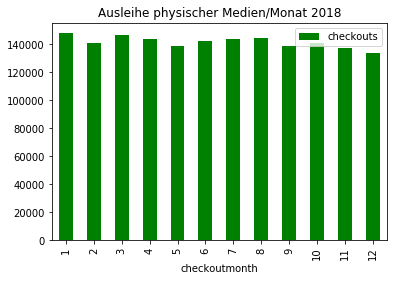

In [83]:
# Auch die Ausleihen/Monat 2018 für die physischen Medien können wir uns in einem Säulendiagramm anzeigen lassen
phypiv.plot (kind="bar", color="green")
plt.title('Ausleihe physischer Medien/Monat 2018')

In [3]:
# Nun wollen wir die beiden Diagramme zusammen abbilden. Hierzu laden wir zunächst noch eine weitere Bibliothek, numpy
import numpy as np
import matplotlib.pyplot as plt


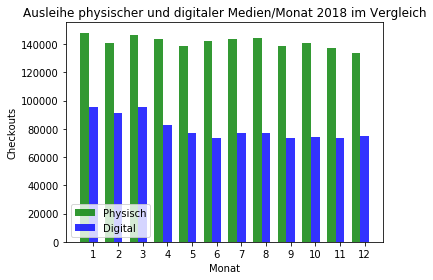

In [16]:
# Nun erstellen wir mit den Werten für digitale Medien aus Frage 1 und den hier ermittelten Werten für physische Medien ein vergleichendes Säulendiagramm

# Wir legen die Werte für die Achsen und Säulen fest
n_groups=12
phy_means=(147972,140489,146320,143519,138853,142239,143870,144617,138793,141075,137283,133650)
dig_means=(95694,91466,95617,82697,76982,73696,76787,77326,73560,74469,73333,74791)
fig, ax=plt.subplots()
index=np.arange(n_groups)
bar_width=0.35
opacity=0.8

# Wir bestimmen Säulenfarbe und -bezeichnung
rects1=plt.bar(index,phy_means,bar_width,alpha=opacity,color='g',label='Physisch')
rects2=plt.bar(index+bar_width,dig_means,bar_width,alpha=opacity,color='b',label='Digital')

# Wir beschriften die Achsen und vergeben einen Titel
plt.xlabel('Monat')
plt.ylabel('Checkouts')
plt.title('Ausleihe physischer und digitaler Medien/Monat 2018 im Vergleich')
plt.xticks(index+bar_width, ('1','2','3','4','5','6','7','8','9','10','11','12'))
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

Lösung Frage 2: Das Diagramm stellt die Ausleihen physischer und digitaler Medien/Monat 2018 einander gegenüber.

## Frage 3: Welche und wie viele weitere Medien gibt es 2018 in der Bibliothek?

Welche anderen Medien können neben Büchern (Bücher und EBooks) ausgeliehen werden? Wie viele gibt es jeweils?

In [45]:
# Wir reduzieren die Tabelle auf die Spalte "Materialtype"
checkout[["materialtype"]]

,materialtype
0,BOOK
1,BOOK
2,VIDEODISC
3,AUDIOBOOK
4,BOOK
...,...
2665093,MUSIC
2665094,BOOK
2665095,BOOK
2665096,BOOK


In [47]:
# Im nächsten Schritt lassen wir uns die einzelnen Werte der Spalte "materialtype" anzeigen
checkout.materialtype.value_counts()

BOOK                                          1222642
EBOOK                                          618983
AUDIOBOOK                                      261035
VIDEODISC                                      233007
SOUNDDISC                                      226107
SONG                                            44455
MUSIC                                           18500
TELEVISION                                       9566
MOVIE                                            9044
COMIC                                            8012
REGPRINT                                         2751
SOUNDDISC, VIDEODISC                             2355
VIDEO                                            1850
MAGAZINE                                         1312
SOUNDREC                                         1256
CR                                               1057
ER                                                851
ER, SOUNDDISC                                     693
ER, VIDEODISC               

In [80]:
# In unserem Diagramm wollen wir Bücher und EBooks auslassen. 
# Außerdem fassen wir zur besseren Übersichtlichkeit die Medien unter 1000 Einheiten unter "Sonstige" zusammnen.
# "Sonstige" umfasst 2.904 Einheiten
# Wir erstellen ein Kreisdiagramm
import matplotlib.pyplot as plt
import pandas as pd
material=['AUDIOBOOK','VIDEODISC','SOUNDDISC','SONG','MUSIC','TELEVISION','MOVIE','COMIC','REGPRINT','SOUNDDISC VIDEODISC','VIDEO','MAGAZINE','SOUNDREC','CR','Sonstige']
series=pd.Series([261035,233007,226107,44455,18500,9566,9044,8012,2751,2355,1850,1312,1256,1057,2904],
                 index=material,
                 name='Material')

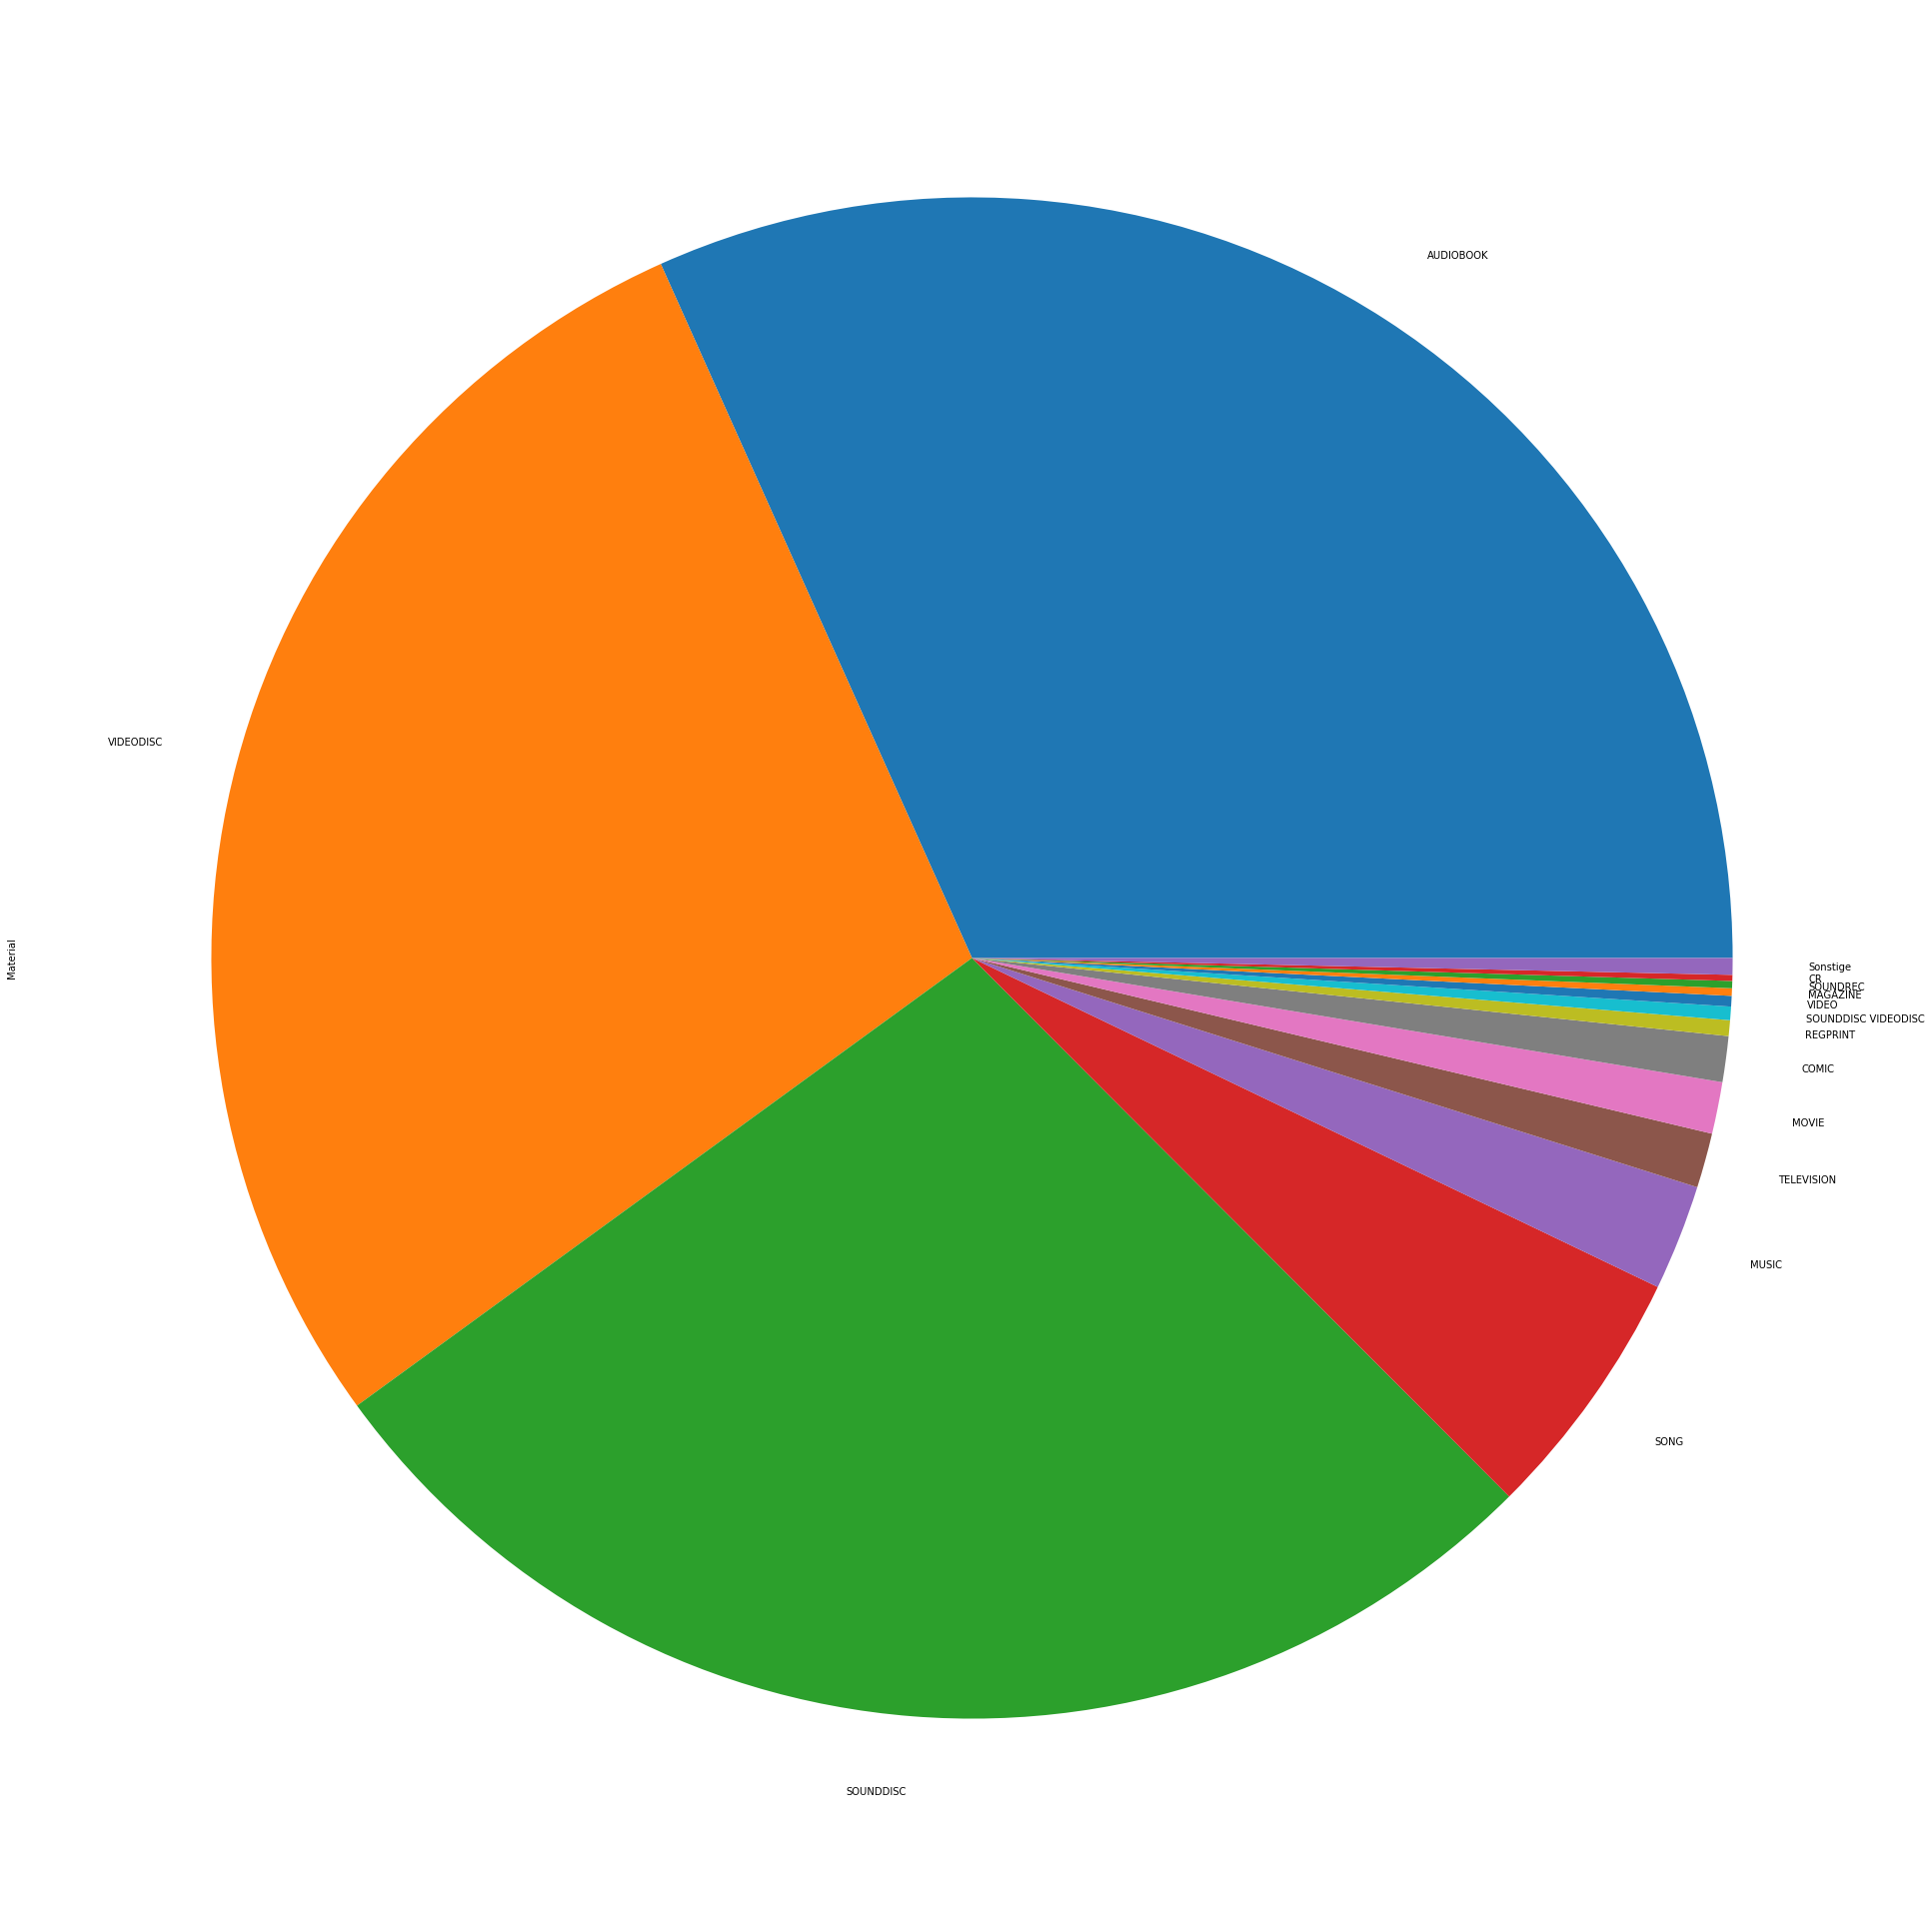

In [86]:
# Wir lassen uns das Diagramm anzeigen und vergrößern es
series.plot.pie(figsize=(35, 35))

Lösung 3: Verfügbare Medien außerhalb der Kategorien Book und EBook werden in dem Diagramm dargestellt und hinsichtlich ihrer Anzahl in repräsentiert.

## Frage 4: Welcher Titel des Materialtyps Musik wurde 2018 am häufigsten ausgeliehen?

In [104]:
# Für die Frage sind die Spalten "materialtype","title", "creator" und "checkouts" relevant. Diese lassen wir uns anzeigen.
checkout[["materialtype","title","creator","checkouts"]]

,materialtype,title,creator,checkouts
0,BOOK,"Naruto. Vol. 65, Hashirama and Madara / story ...","Kishimoto, Masashi, 1974-",1
1,BOOK,Oishisō na shirokuma / Shibata Keiko.,"Shibata, Keiko.",2
2,VIDEODISC,Like crazy / Paramount Vantage ; Indian Paintb...,NaN,7
3,AUDIOBOOK,Catch a Falling Heiress: American Heiress In L...,Laura Lee Guhrke,3
4,BOOK,Literally show me a healthy person / Darcie Wi...,"Wilder, Darcie",1
...,...,...,...,...
2665093,MUSIC,The Snow Queen,NaN,1
2665094,BOOK,There was an old lady who swallowed a fly / il...,NaN,4
2665095,BOOK,The book of night women / Marlon James.,"James, Marlon, 1970-",2
2665096,BOOK,Hunting Eve / Iris Johansen.,"Johansen, Iris",1


In [105]:
# Uns interessiert in der Spalte nur der Materialtyp "MUSIC"
musicall=checkout.materialtype.str.contains(pat="MUSIC")
musicall

0          False
1          False
2          False
3          False
4          False
           ...  
2665093     True
2665094    False
2665095    False
2665096    False
2665097    False
Name: materialtype, Length: 2665098, dtype: bool

In [106]:
# Auch dieses Ergebnis lassen wir uns in einer Tabelle anzeigen, reduziert auf die nötigen Spalten
musiconly=checkout[musicall]

In [107]:
musiconly[["materialtype","title","creator","checkouts"]]

,materialtype,title,creator,checkouts
168,MUSIC,Mamma mia! / music and lyrics by Benny Anderss...,"Andersson, Benny",1
188,MUSIC,Newsies : music from the Broadway musical : pi...,"Menken, Alan",1
337,MUSIC,"Opus 8, Shifting (changing the position) / Ota...","Ševčík, O. (Otakar), 1852-1934",1
343,MUSIC,"Streich-Quartette für 2 Violinen, Viola und Vi...","Beethoven, Ludwig van, 1770-1827",1
985,MUSIC,50 easy classical themes : representing more t...,NaN,2
...,...,...,...,...
2664733,MUSIC,The Alec Wilder song collection / in collabora...,"Wilder, Alec",1
2664804,MUSIC,What's That Sound?,NaN,1
2664993,MUSIC,"Berklee jazz bass / Rich Appleman, Whit Browne...","Appleman, Rich",2
2665025,MUSIC,In The Lonely Hour,NaN,1


In [108]:
# Um diese Tabelle als Grundlage nutzen zu können vergeben wir eine weitere Variable
musicyear=musiconly[["materialtype","title","creator","checkouts"]]

In [109]:
# Innerhalb dieser Tabelle bestimmen wir nun den höchsten Wert in der Spalte "Checkouts".
musicyear.checkouts.max()

123

In [110]:
# Nun lassen wir uns die Zeile anzeigen, die den ermittelten höchsten Wert enthält
musicyear[musicyear.checkouts>=123]

,materialtype,title,creator,checkouts
2384234,MUSIC,Hamilton (Original Broadway Cast Recording),NaN,123


Lösung 4: Der meistgeliehene Titel vom Materialtyp Musik war 2018 "Hamilton (Original Broadway Cast Recording)". 
Die Einbeziehung der Spalte "Creator" brachte in diesem Fall keinen Mehrwert.